In [1]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use("ggplot")

In [2]:
from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets
 


In [3]:
plt.rcParams['figure.figsize'] = (20,12) 

## Data Preprocessing

#### Storing the image as Numpy Array

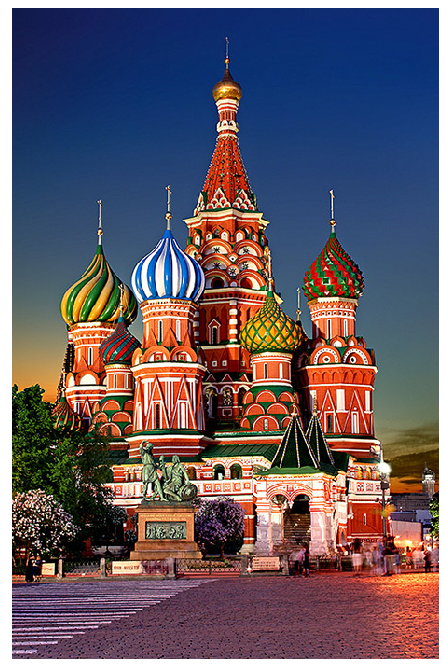

In [4]:
img = io.imread('images/Saint_Basils_Cathedral.jpg') 
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);

In [5]:
img.shape #image has a height of 700 pixels and width of 460 pixels. Since it's a color image so it has a depth of 3 (RGB)

(700, 460, 3)

#### A stack of 3 grids of 700 by 460 pixels.

#### Transforming the 700 by 460 pixels into one long vector for each of these color channels

In [6]:
img_data = (img/255.0).reshape(700*460, 3) #(img/255.0) is done to normalise the data between 0 and 1, rather than 0 to 255.
img_data.shape

(322000, 3)

In [7]:
from sklearn.cluster import MiniBatchKMeans

In [8]:
kmeans= MiniBatchKMeans(16).fit(img_data)
k_colors = kmeans.cluster_centers_[kmeans.predict(img_data)]

In [15]:
img_dir='images/'
@interact
def color_compression(image = os.listdir(img_dir), k=IntSlider(min=1 , max=256, step=1, value=16,
                                                               continuous_update=False, layout=dict(width='100%'))):
    input_img=io.imread(img_dir+image)
    img_data = (input_img/255.0).reshape(-1,3)
    
    kmeans = MiniBatchKMeans(k)
    k_label_pred=kmeans.fit_predict(img_data)
    
    k_colors = kmeans.cluster_centers_[k_label_pred]
    
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    fig.suptitle('K Means Image Compression')
    ax1.set_title('Compressed')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    
    ax2.set_title('Original')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    
    plt.subplots_adjust(top=0.85)
    plt.show()
    

interactive(children=(Dropdown(description='image', options=('GoldenGateBridge.jpg', 'peacock.jpg', 'Saint_Bas…